 # Undergraduate Project #
## Multi-photon scattering on a qubit: Space-time structure of the scattered field  
### Advisor: 吳致盛  &emsp; &emsp; Author: 李冠霖 [(seaotter.alex.c@nycu.edu.tw)](mailto:seaotter.alex.c@nycu.edu.tw)  
[National Yang Ming Chiao Tung University](https://www.nycu.edu.tw/), [Department of Photonics](https://dop.nycu.edu.tw/ch/index.html), [Quantum Nano-Optics Laboratory](https://jhihsheng.github.io/)


This Jupyter notebook simply displays the current research progress from simulation results.

We are interested in the electromagnetic field generated by the interaction between multi-photons and single quanta. This research topic may have important applications in quantum devices and quantum information technology. We start from the study of the scattering field between single photon and single quantum, hoping to get the same results as the reference paper:[Single-photon scattering on a qubit: Space-time structure of the scattered field](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.107.013519)(PHYSICAL REVIEW A 107, 013519 (2023)). Below is a presentation of preliminary results.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, integrate, oo, cos
from scipy.integrate import quad
import scipy.special as sc
from IPython.display import HTML

## Basic Assumptions  
First of all, we assume that there is a single-photon Gaussian pulse of incident light interacting with a single two-level quantum in a one-dimensional waveguide, producing a reflected light and a transmitted light. As show in fig-1.

In [6]:
# FIG. 1. in PHYSICAL REVIEW A 107, 013519 (2023)
HTML("""<img src="https://journals.aps.org/pra/article/10.1103/PhysRevA.107.013519/figures/1/medium" alt="Image" width="500">""")

### Simulation 1
We will simulate the transmitted field at t = 1ns, and t = 9ns according to Equation 36.  
  
$ 
T(\omega_s,x,t)=T(\omega_s)e^{i\frac{\omega_s}{v_g}(x-v_gt)}$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$+\frac {iR(\omega_s)}{2\pi } e^ {i\frac {\Omega}{v_g}(x-v_gt)} e^ {\frac {\Gamma/2}{v_g}(x-v_gt)} [E_1(i\frac {x}{v_g}\tilde \Omega))+2\pi i - E_1(-i \frac {|x-v_gt|}{v_g}\tilde\Omega)]$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$+\frac{R(\omega_s)}{2\pi}$ $e^{i\frac {\omega_s}{v_g}(x-v_gt)}[ici(\omega_{s}\frac{x}{v_g})+si(\omega_s\frac{x}{v_g})-ici(\omega_s\frac{|x-v_ gt|}{v_g})+si(\omega_s\frac{|x-v_gt|}{v_g})]$  
<div align='right'>$Eq(36)$</div>  
&emsp; &emsp; &emsp;  where  &emsp; $x>0$ &emsp; $x-v_gt<0$

The exponential integral is defined as  
<div align='center'>$ E_1(z) = \int_{1}^{\infty}$$\frac{e^{-zt}}{t}$$dt$&emsp;&emsp;$Real(z)>0$</div>  
And the sine integral and cosine integral is defined as  
<div align='center'>$si(xy) = - \int_x^{\infty} \frac{sin(zy)}{z}dz$</div>  
<div align='center'>$ci(xy) = - \int_x^{\infty} \frac{cos(zy)}{z}dz$</div>  

After calculation, the simulation results are as follows

In [14]:
# here is the specific parameter assumptions
t1 = 10**(-9)                                           # for t=1ns
t2 = 5*(10**(-9))                                       # for t=5ns
velocity_g = 3*10**8                                    # assume group velocity of EM waves equal to that in free space, unit m/s
wavelength = 0.06                                       # wavelength of incident light, unit m
wavelength_a = 0.1*wavelength                           # simulated range of position x, start
wavelength_b = 1.1*wavelength                           # simulated range of position x, end
x_width = 100                                           # number of samples for position x
x = np.linspace(wavelength_a, wavelength_b, x_width)    # sequence of position x
Omega = 2*math.pi*5*(10**9)                             # excitation frequency of the qubit, unit GHz
Omega_a = 0.95*Omega                                    # simulated range of photon frequency omega_s, start
Omega_b = 1.05*Omega                                    # simulated range of photon frequency omega_s, end
o_width = 100                                           # number of samples for photon frequency omega_s
omega_s = np.linspace(Omega_a, Omega_b, o_width)        # sequence of photon frequency
Gamma = 2*math.pi*0.01*(10**9)                          # the rate of spontaneous emission into waveguide modes, GHz
tilde_Omega = Omega - 1j*Gamma/2                        # be used to simplify calculations

In [15]:
# Initialize the two-dimensional array used to store results
Transmission_o_x_t1 = np.array([[0+0j]*len(x)]*o_width) # Store the result when t=1ns
Transmission_o_x_t2 = np.array([[0+0j]*len(x)]*o_width) # Store the result when t=5ns
T1 = np.array([[0+0j]*len(x)]*o_width)                  # Store the results of the first part
T2 = np.array([[0.0+0.0j]*len(x)]*o_width)              # Store the results of the second part
T3 = np.array([[0+0j]*len(x)]*o_width)                  # Store the results of the third part

In [16]:
# Simulation 1 according to eq(36)
# t1
for i in range(x_width):
    for k in range(o_width):
        Transmission_omega_s = (omega_s[k]-Omega)/(omega_s[k]-Omega+1j*Gamma/2)
        Reflection_omega_s = -1j*Gamma/2/(omega_s[k]-Omega+1j*Gamma/2)
        EX = x[i]-velocity_g*t1
        E1a = 1j*x[i]/velocity_g*tilde_Omega
        E1b = -1j*abs(EX)/velocity_g*tilde_Omega  
        si_a = sc.sici(omega_s[k]*x[i]/velocity_g)[0] - math.pi/2
        ci_a = sc.sici(omega_s[k]*x[i]/velocity_g)[1]
        si_b = sc.sici(omega_s[k]*abs(x[i]-velocity_g*t1)/velocity_g)[0] - math.pi/2
        ci_b = sc.sici(omega_s[k]*abs(x[i]-velocity_g*t1)/velocity_g)[1]
        
        T1[i][k] = Transmission_omega_s*math.e**(1j*omega_s[k]/velocity_g*EX)
        T2[i][k] = 1j*Reflection_omega_s/(2*math.pi)*math.e**(1j*Omega/velocity_g*EX)*\
                   math.e**(Gamma/2/velocity_g*EX)*((sc.exp1(complex(np.real(E1a), np.imag(E1a))))\
                   + 2*math.pi*1j - (sc.exp1(complex(np.real(E1b), np.imag(E1b)))))
        T3[i][k] = Reflection_omega_s/2/math.pi*math.e**(1j*omega_s[k]/velocity_g*EX)*\
                   (1j*ci_a+si_a-1j*ci_b+si_b)          
        Transmission_o_x_t1[i][k] = T1[i][k] + T2[i][k] + T3[i][k] 
        
        if x[i] <= 0 :
            print('x<=0')
            print('x=',x[i])
            print('i=',i,'k=',k)
            break
        if EX >= 0 :
            print('x-velocity_g*t >= 0')
            break
            
# t2
for i in range(x_width):
    for k in range(o_width):
        Transmission_omega_s = (omega_s[k]-Omega)/(omega_s[k]-Omega+1j*Gamma/2)
        Reflection_omega_s = -1j*Gamma/2/(omega_s[k]-Omega+1j*Gamma/2)
        EX = x[i]-velocity_g*t2
        E1a = 1j*x[i]/velocity_g*tilde_Omega
        E1b = -1j*abs(EX)/velocity_g*tilde_Omega
        si_a, ci_a = sc.sici(omega_s[k]*x[i]/velocity_g)
        si_a = si_a - math.pi/2
        si_b, ci_b = sc.sici(omega_s[k]*abs(x[i]-velocity_g*t2)/velocity_g)
        si_b = si_b - math.pi/2
        # Transmission_o_x_t2
        T1[i][k] = Transmission_omega_s*math.e**(1j*omega_s[k]/velocity_g*EX)
        T2[i][k] = 1j*Reflection_omega_s/(2*math.pi)*math.e**(1j*Omega/velocity_g*EX)*\
                   math.e**(Gamma/2/velocity_g*EX)*((sc.exp1(complex(np.real(E1a), np.imag(E1a))))\
                   +2*math.pi*1j - sc.exp1(complex(np.real(E1b), np.imag(E1b))))
        T3[i][k] = Reflection_omega_s/2/math.pi*math.e**(1j*omega_s[k]/velocity_g*EX)*\
                   (1j*ci_a+si_a-1j*ci_b+si_b)          
        Transmission_o_x_t2[i][k] = T1[i][k] + T2[i][k] + T3[i][k] 
        if x[i] <= 0 :
            print('x<=0')
            print('x=',x[i])
            print('i=',i,'k=',k)
            break
            break
        if EX >= 0 :
            print('x-velocity_g*t >= 0')
            break
            break

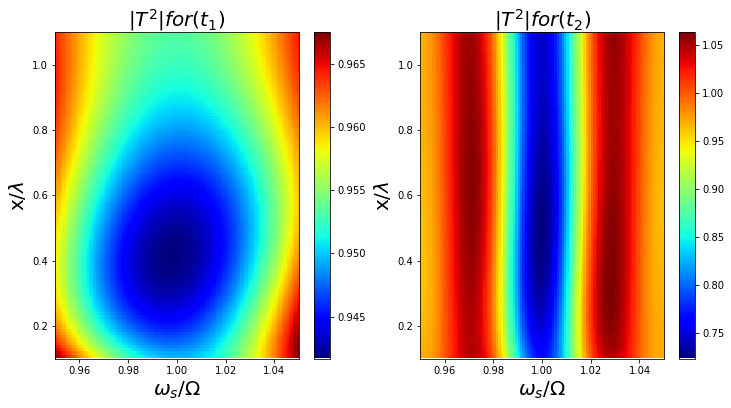

In [25]:
# Output simulation results
# t1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(abs(Transmission_o_x_t1)**2,cmap='jet', origin='lower', 
           extent=[Omega_a/Omega, Omega_b/Omega, wavelength_a/wavelength, wavelength_b/wavelength], 
           aspect='auto')
plt.colorbar()
plt.title('$|T^2|for(t_1)$',fontsize=20)
plt.xlabel('$\omega_s/\Omega$',fontsize=20)
plt.ylabel('x/$\lambda$',fontsize=20)

# t2
plt.subplot(1,2,2)
plt.imshow(abs(Transmission_o_x_t2)**2,cmap='jet', origin='lower', 
           extent=[Omega_a/Omega, Omega_b/Omega, wavelength_a/wavelength, wavelength_b/wavelength], 
           aspect='auto')
plt.colorbar()
plt.title('$|T^2|for(t_2)$',fontsize=20)
plt.xlabel('$\omega_s/\Omega$',fontsize=20)
plt.ylabel('x/$\lambda$',fontsize=20)
plt.show()